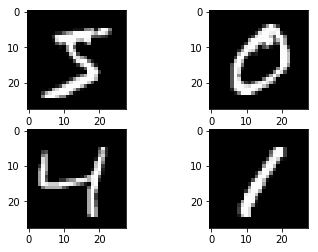

In [53]:
# Plot ad hoc mnist instances

from keras.datasets import mnist
import matplotlib.pyplot as plt

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [54]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [55]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
#print(num_pixels)
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [56]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(512, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [57]:
# build the model
model = baseline_model()
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, verbose=2)
# Final evaluation of the model
scores= model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
#print(scores)
print("Test Accuracy: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 21s - loss: 0.3682 - acc: 0.8868 - val_loss: 0.1309 - val_acc: 0.9608
Epoch 2/50
 - 13s - loss: 0.1641 - acc: 0.9505 - val_loss: 0.0916 - val_acc: 0.9712
Epoch 3/50
 - 13s - loss: 0.1242 - acc: 0.9616 - val_loss: 0.0827 - val_acc: 0.9749
Epoch 4/50
 - 13s - loss: 0.1064 - acc: 0.9672 - val_loss: 0.0720 - val_acc: 0.9767
Epoch 5/50
 - 13s - loss: 0.0911 - acc: 0.9716 - val_loss: 0.0683 - val_acc: 0.9794
Epoch 6/50
 - 13s - loss: 0.0818 - acc: 0.9746 - val_loss: 0.0617 - val_acc: 0.9821
Epoch 7/50
 - 13s - loss: 0.0739 - acc: 0.9764 - val_loss: 0.0597 - val_acc: 0.9820
Epoch 8/50
 - 13s - loss: 0.0674 - acc: 0.9779 - val_loss: 0.0613 - val_acc: 0.9820
Epoch 9/50
 - 13s - loss: 0.0631 - acc: 0.9800 - val_loss: 0.0600 - val_acc: 0.9829
Epoch 10/50
 - 13s - loss: 0.0581 - acc: 0.9808 - val_loss: 0.0574 - val_acc: 0.9830
Epoch 11/50
 - 13s - loss: 0.0558 - acc: 0.9822 - val_loss: 0.0601 - val_acc: 0.9822
Epoch 12/50
 - 13s - los

In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 784)               402192    
_________________________________________________________________
dropout_11 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                7850      
Total params: 811,962
Trainable params: 811,962
Non-trainable params: 0
_________________________________________________________________


In [59]:
#model.metrics_names
print(scores)

[0.05808094469447856, 0.987]


In [60]:
history.history.keys()

dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])

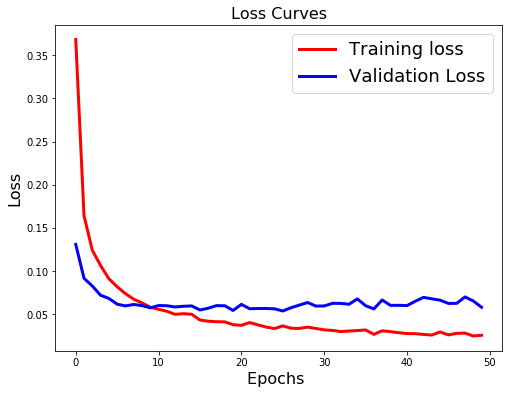

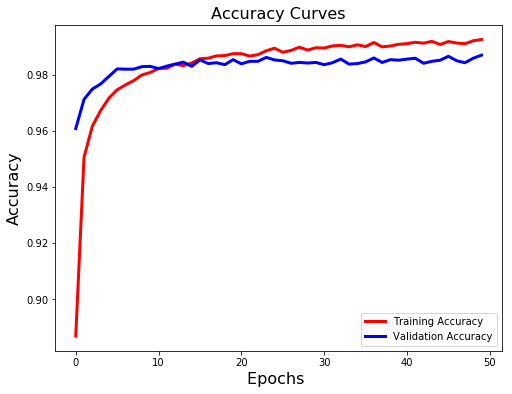

In [61]:
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2

#Plot the Loss Curves
plt1.figure(figsize=[8,6])
plt1.plot(history.history['loss'],'r',linewidth=3.0)
plt1.plot(history.history['val_loss'],'b',linewidth=3.0)
plt1.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt1.xlabel('Epochs ',fontsize=16)
plt1.ylabel('Loss',fontsize=16)
plt1.title('Loss Curves',fontsize=16)
plt1.show()

#Plot the Accuracy Curves
plt2.figure(figsize=[8,6])
plt2.plot(history.history['acc'],'r',linewidth=3.0)
plt2.plot(history.history['val_acc'],'b',linewidth=3.0)
plt2.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=10)
plt2.xlabel('Epochs ',fontsize=16)
plt2.ylabel('Accuracy',fontsize=16)
plt2.title('Accuracy Curves',fontsize=16)
plt2.show()